In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
def choose_statistic(x, sample_stat_text):
  # calculate mean if the text is "Mean"
  if sample_stat_text == "Mean":
    return np.mean(x)
  # calculate minimum if the text is "Minimum"
  elif sample_stat_text == "Minimum":
    return np.min(x)
  # calculate variance if the text is "Variance"
  elif sample_stat_text == "Variance":
    return np.var(x)
  # if you want to add an extra stat
  # raise error if sample_stat_text is not "Mean", "Minimum", or "Variance"
  else:
    raise Exception('Make sure to input "Mean", "Minimum", or "Variance"')

In [3]:
def population_distribution(population_data):
  # plot the population distribution
  sns.histplot(population_data, stat='density')
  # informative title for the distribution 
  plt.title(f"Population Distribution")
  # remove None label
  plt.xlabel('')
  plt.show()
  plt.clf()

In [4]:
def sampling_distribution(population_data, samp_size, stat):
  # list that will hold all the sample statistics
  sample_stats = []
  for i in range(500):
    # get a random sample from the population of size samp_size
    samp = np.random.choice(population_data, samp_size, replace = False)
    # calculate the chosen statistic (mean, minimum, or variance) of the sample
    sample_stat = choose_statistic(samp, stat)
    # add sample_stat to the sample_stats list
    sample_stats.append(sample_stat)
  
  pop_statistic = round(choose_statistic(population_data, stat),2)
  # plot the sampling distribution
  sns.histplot(sample_stats, stat='density')
  # informative title for the sampling distribution
  plt.title(f"Sampling Distribution of the {stat} \nMean of the Sample {stat}s: {round(np.mean(sample_stats), 2)} \n Population {stat}: {pop_statistic}")
  plt.axvline(pop_statistic,color='g',linestyle='dashed', label=f'Population {stat}')
  # plot the mean of the chosen sample statistic for the sampling distribution
  plt.axvline(np.mean(sample_stats),color='orange',linestyle='dashed', label=f'Mean of the Sample {stat}s')
  plt.legend()
  plt.show()
  plt.clf()

In [5]:
# load in the spotify dataset
spotify_data = pd.read_csv("spotify_data.csv")
# preview the dataset
print(spotify_data.head())

     tempo  danceability  energy  instrumentalness  liveness  valence
0  156.985         0.831   0.814          0.013400    0.0556   0.3890
1  115.080         0.719   0.493          0.000000    0.1180   0.1240
2  218.050         0.850   0.893          0.000004    0.3720   0.0391
3  186.948         0.476   0.781          0.000000    0.1140   0.1750
4  147.988         0.798   0.624          0.000000    0.1660   0.5910


In [6]:
# select the tempo column
song_tempos = spotify_data['tempo']

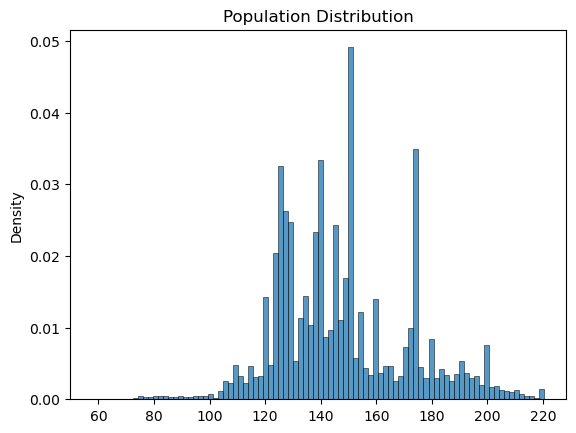

<Figure size 640x480 with 0 Axes>

In [8]:
# plot the population distribution with the mean labeled
population_distribution(song_tempos)

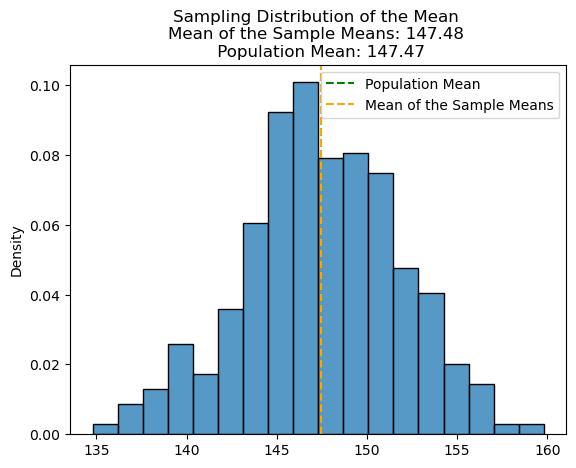

<Figure size 640x480 with 0 Axes>

In [10]:
# sampling distribution of the sample mean
sampling_distribution(song_tempos, 30, "Mean")

The mean is also an unbiased estimator as the mean of the sampling distribution of the mean is always approximately the same as the population mean.

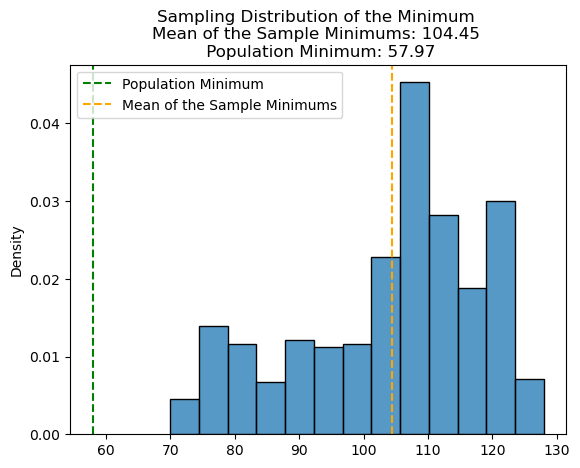

<Figure size 640x480 with 0 Axes>

In [11]:
# sampling distribution of the sample minimum
sampling_distribution(song_tempos, 30, "Minimum")

The mean of the sample minimums is consistently much higher than the population minimum. In this scenario, we are looking for high-tempo songs for the party, so this is actually a good thing!

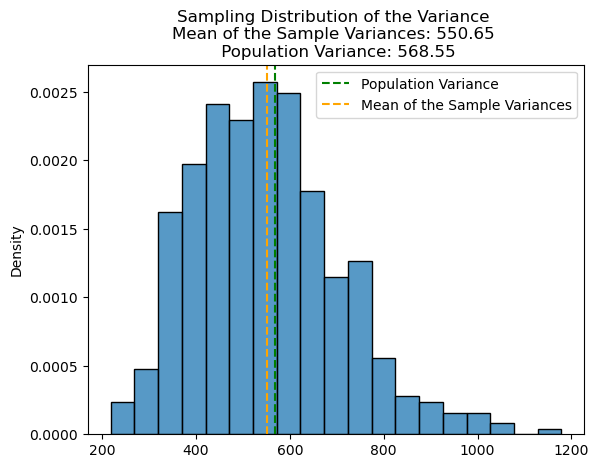

<Figure size 640x480 with 0 Axes>

In [12]:
# sampling distribution of the sample variance
sampling_distribution(song_tempos, 30, "Variance")

The mean of the sample variances is consistently slightly less than the population variance, meaning it is a biased estimator.
However, it is super close. Let’s dig into this.

We calculated the sample variance the same way we calculate population variance.

However, the formulas for sample variance and population variance are actually distinct. As we have seen, population variance is calculated as:
<div>
<img src="Screenshot 2025-01-10 235154.png"width="400"/>
</div>

When we measure the sample variance using the same formula, it turns out that we tend to underestimate the population variance. Because of this, we divide by n-1 instead of n:
<div>
<img src="Screenshot 2025-01-10 235206.png"width="400"/>
</div>

Using this formula, sample variance becomes an unbiased estimator of the population variance. 

Changing the variance calculation in the previously declared function according to this:

In [13]:
def choose_statistic(x, sample_stat_text):
  # calculate mean if the text is "Mean"
  if sample_stat_text == "Mean":
    return np.mean(x)
  # calculate minimum if the text is "Minimum"
  elif sample_stat_text == "Minimum":
    return np.min(x)
  # calculate variance if the text is "Variance"
  elif sample_stat_text == "Variance":
    #return np.var(x)
    np.var(x, ddof=1)

  # if you want to add an extra stat
  # raise error if sample_stat_text is not "Mean", "Minimum", or "Variance"
  else:
    raise Exception('Make sure to input "Mean", "Minimum", or "Variance"')

By changing the way we calculate sample variance, we have made it an unbiased parameter.

In [14]:
# calculate the population mean and standard deviation
population_mean = np.mean(song_tempos)
population_std = np.std(song_tempos)

<div>
<img src="Screenshot 2025-01-10 235829.png"width="400"/>
</div>

In [15]:
# calculate the standard error
standard_error = population_std / (30**.5)

In [16]:
# calculate the probability of observing an average tempo of 140bpm or lower from a sample of 30 songs 
print(stats.norm.cdf(140, population_mean, standard_error))

0.043003550159586706


In [17]:
# calculate the probability of observing an average tempo of 150bpm or higher from a sample of 30 songs
print(1 - stats.norm.cdf(150, population_mean, standard_error))

0.28088028101821827
